<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week7_hoangmanhthang/Model/RNN/DXG_RNN_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [67]:
# 2. Đọc file csv
df = pd.read_csv('DXG-Data.csv')
df

,Date,Price
0,2017-01-03,6066.50
1,2017-01-04,6166.40
2,2017-01-05,6091.50
3,2017-01-06,6141.40
4,2017-01-07,6116.45
...,...,...
2702,2024-05-28,16800.00
2703,2024-05-29,16850.00
2704,2024-05-30,16850.00
2705,2024-05-31,16800.00


In [68]:
df1=df.reset_index()['Price']

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2707 non-null   object 
 1   Price   2707 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.4+ KB


In [70]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [71]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [72]:
test_data

array([[0.36524635],
       [0.36873671],
       [0.38272273],
       [0.37689727],
       [0.37340076],
       [0.37340076],
       [0.3443042 ],
       [0.36991655],
       [0.35826564],
       [0.3466393 ],
       [0.35944548],
       [0.35571423],
       [0.35571423],
       [0.36758145],
       [0.36642619],
       [0.3885236 ],
       [0.36991655],
       [0.33383313],
       [0.36525618],
       [0.36525618],
       [0.3000848 ],
       [0.27098209],
       [0.2977497 ],
       [0.29310408],
       [0.29076898],
       [0.29053793],
       [0.29053793],
       [0.29425934],
       [0.26400138],
       [0.26518122],
       [0.23723377],
       [0.23956887],
       [0.26004891],
       [0.26004891],
       [0.2535303 ],
       [0.24654958],
       [0.26400138],
       [0.26749173],
       [0.27798739],
       [0.26191208],
       [0.26191208],
       [0.25702066],
       [0.23258815],
       [0.211646  ],
       [0.21629162],
       [0.24074871],
       [0.23165903],
       [0.231

In [73]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [74]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [75]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [76]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [77]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 [==============================] - 2s 27ms/step - loss: 0.0015 - val_loss: 1.2485e-04
Epoch 2/100
37/37 [==============================] - 1s 20ms/step - loss: 3.7160e-04 - val_loss: 1.3572e-04
Epoch 3/100
37/37 [==============================] - 1s 20ms/step - loss: 3.5717e-04 - val_loss: 2.1065e-04
Epoch 4/100
37/37 [==============================] - 1s 28ms/step - loss: 3.6285e-04 - val_loss: 3.9625e-04
Epoch 5/100
37/37 [==============================] - 1s 35ms/step - loss: 3.8433e-04 - val_loss: 3.1307e-04
Epoch 6/100
37/37 [==============================] - 1s 38ms/step - loss: 3.4586e-04 - val_loss: 1.0473e-04
Epoch 7/100
37/37 [==============================] - 1s 27ms/step - loss: 3.2751e-04 - val_loss: 1.2783e-04
Epoch 8/100
37/37 [==============================] - 1s 20ms/step - loss: 3.0684e-04 - val_loss: 1.0470e-04
Epoch 9/100
37/37 [==============================] - 1s 20ms/step - loss: 3.1226e-04 - val_loss: 1.2830e-04
Epoch 10/100
37/37 [============

In [78]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 7ms/step


In [79]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

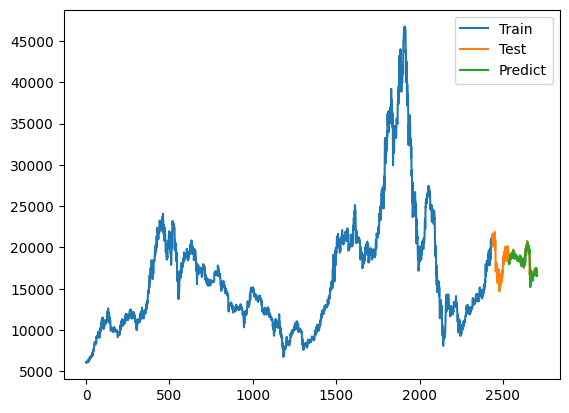

In [80]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [81]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [82]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 400.80588110931313
MAE: 284.3009295642258
MAPE: 0.01563815804047805


In [83]:
predictions_30 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(30):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_30.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 25ms/step


In [84]:
predictions_60 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(60):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_60.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 39ms/step


In [85]:
predictions_90 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(90):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_90.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 24ms/step


In [86]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred30

array([[16790.88850963],
       [16713.24239302],
       [16434.41111438],
       [16318.0546985 ],
       [16270.25456575],
       [16342.84956241],
       [16125.47499108],
       [15918.6555145 ],
       [15918.40514094],
       [15752.67481561],
       [15536.45390262],
       [15513.37103616],
       [15502.11938153],
       [15329.57319667],
       [15431.06300014],
       [15443.50771815],
       [15392.90437144],
       [15427.02913646],
       [15370.78056304],
       [15161.49614963],
       [15178.30391496],
       [15205.24544422],
       [15157.67871056],
       [15222.37329973],
       [15227.22921317],
       [15074.11516933],
       [15069.52114785],
       [15088.84174229],
       [15046.35583392],
       [14988.58319478]])

In [87]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred60=scaler.inverse_transform(predictions_60)

y_pred90=scaler.inverse_transform(predictions_90)


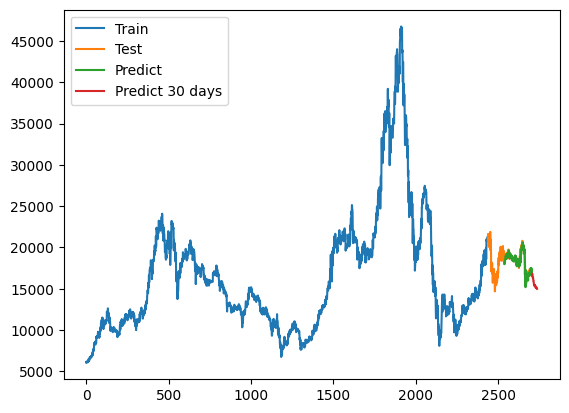

In [88]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_30_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(predict_30_days,(y_pred30))
plt.legend(['Train','Test','Predict', 'Predict 30 days'])
plt.show()



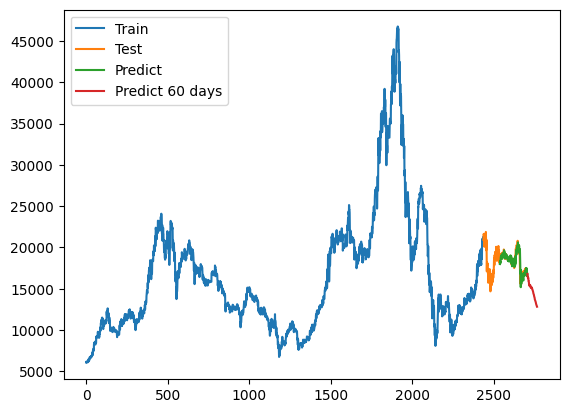

In [89]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_60_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+60, step=1)
plt.plot(predict_60_days,(y_pred60))
plt.legend(['Train','Test','Predict','Predict 60 days',])
plt.show()



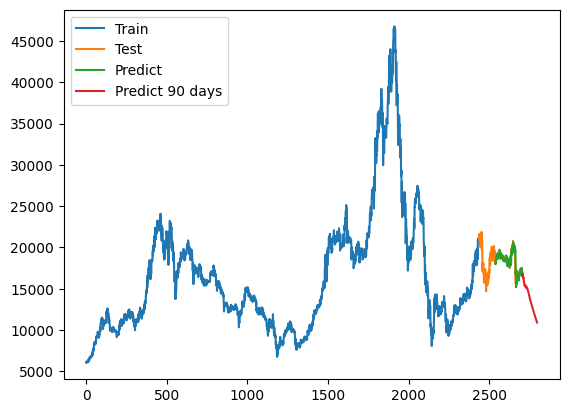

In [90]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_90_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+90, step=1)
plt.plot(predict_90_days,(y_pred90))
plt.legend(['Train','Test','Predict', 'Predict 90 days'])
plt.show()

